## Analysis of Employee Exit Surveys

In this project we'll examine the employee exit surveys of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In [1]:
import pandas as pd
import missingno as msno;
import seaborn as sb;

In [2]:
pd.options.display.max_rows = 40
pd.options.display.max_columns = None
pd.options.display.width = 300
pd.options.display.expand_frame_repr = False

## DETE Exit Survey Data

In [3]:
path = "data/dete-exit-survey-january-2014.csv"
data = pd.read_csv(path)
data.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


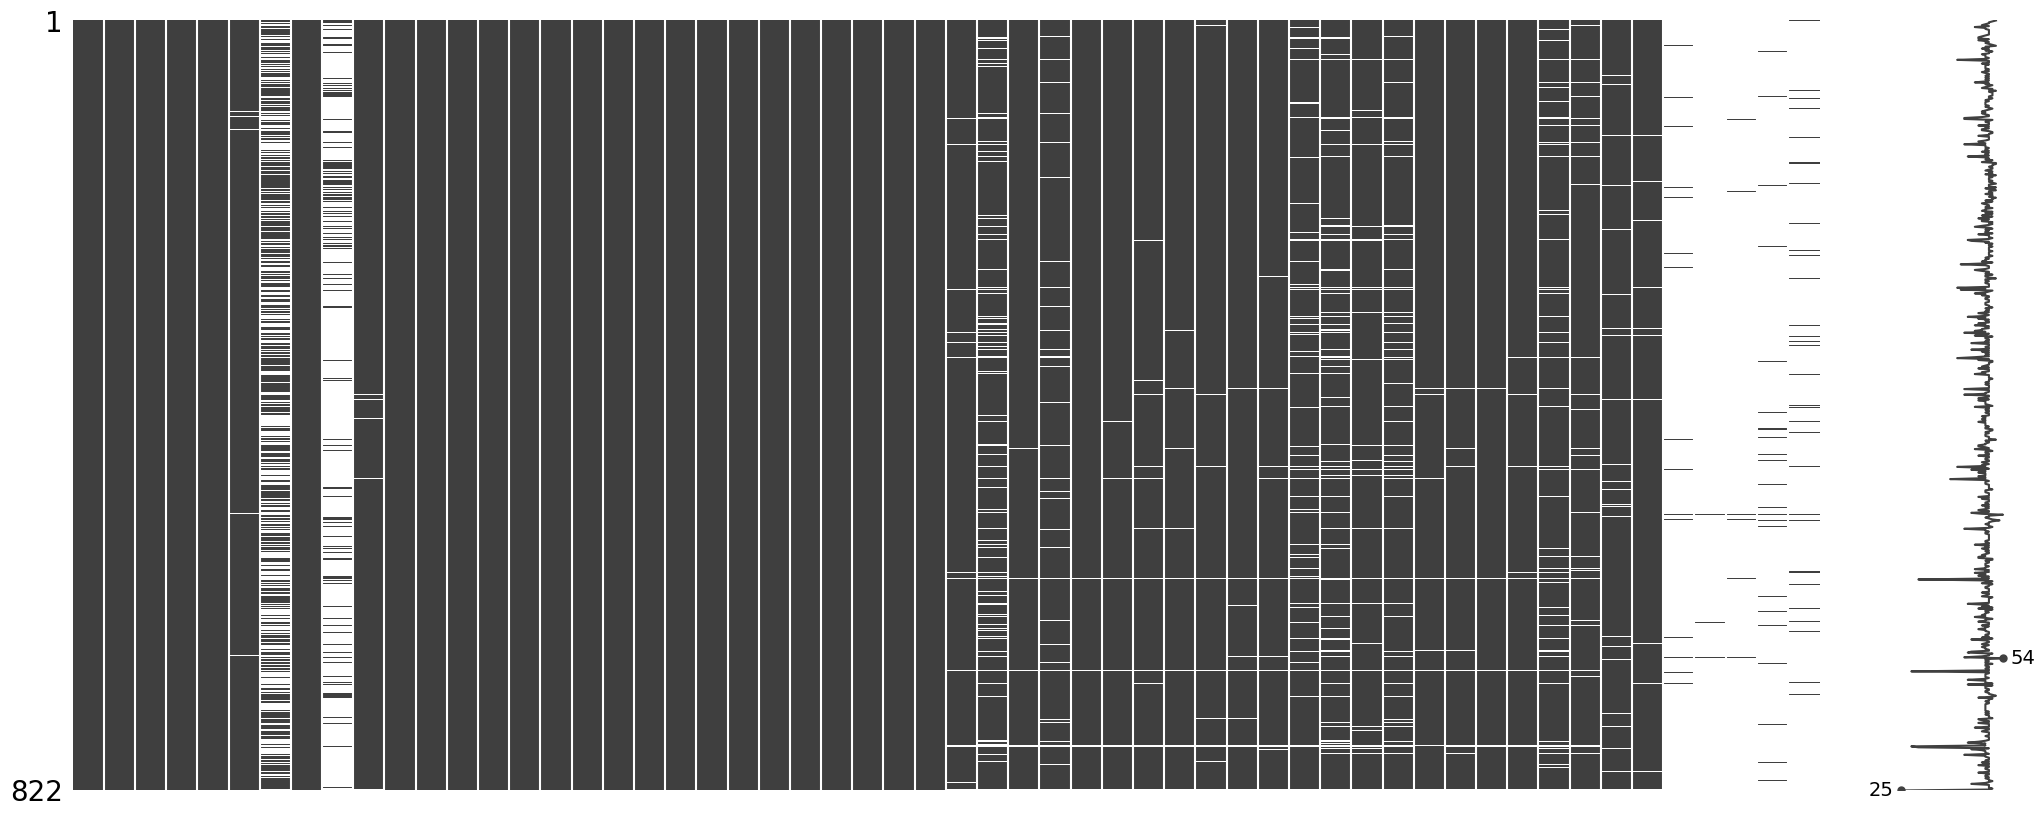

In [4]:
msno.matrix(data);

In [5]:
data.describe(include="all")

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def is_numeric(x):
    try:
        int(x)
        return True
    except:
        return False

### Employment Duration

I'm interpreting _DETE Start Date_ to mean when the person started in the department; if the person changed roles within the department that date would be recoreded in _Role Start Date_.

In [7]:
def categorise_employment(duration):
  if duration >= 20:
    return "More than 20 years"
  elif duration >= 11:
    return "11-20"
  elif duration > 7:
    return "7-10"
  elif duration > 5:
    return "5-6"
  elif duration > 3:
    return "3-4"
  elif duration > 1:
    return "1-2"
  elif duration > 0:
    return "Less than 1 year"
  else:
    return "NaN"

def calculate_employment_duration(entry):
  start_year = entry['DETE Start Date']
  end_year = entry['Cease Date'].split('/')[-1]
  try:
    return int(end_year) - int(start_year)
  except:
    return None

In [8]:
employment_duration = (data
  .apply(calculate_employment_duration, axis=1)
  .apply(categorise_employment)
  .value_counts(dropna=False))
employment_duration

More than 20 years    313
NaN                   134
11-20                 132
3-4                    62
1-2                    54
7-10                   47
5-6                    44
Less than 1 year       36
Name: count, dtype: int64

In [9]:
print(f'{round(employment_duration['Less than 1 year'] / employment_duration.sum() * 100, 1)}% of staff are leaving within the first year of service.')

4.4% of staff are leaving within the first year of service.


The length of employment distribution looks similar to the Poisson distribution

In [10]:
SeparationTypes = data['SeparationType'].value_counts()
SeparationTypes

SeparationType
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [11]:
retiring = round(SeparationTypes['Age Retirement'] / SeparationTypes.sum() * 100)
print(f"{retiring}% of those leaving are retiring")

35% of those leaving are retiring


### Reasons for Leaving

In [12]:
yes_nos = data.describe(include="bool").T
yes_nos['Yes'] = yes_nos['count'] - yes_nos['freq']
yes_nos.rename(columns={'freq': 'No'}, inplace=True)
yes_nos['Percent'] = (yes_nos['Yes'] / yes_nos['count'] * 100).astype(float).round(2)
yes_nos = yes_nos.drop(['unique', 'top'], axis=1).sort_values(by='Percent', ascending=False)
yes_nos

,count,No,Yes,Percent
None of the above,822,605,217,26.40
Work life balance,822,605,217,26.40
Ill Health,822,710,112,13.63
Job dissatisfaction,822,733,89,10.83
Workload,822,735,87,10.58
Career move to private sector,822,742,80,9.73
Relocation,822,754,68,8.27
Maternity/family,822,760,62,7.54
Dissatisfaction with the department,822,761,61,7.42
Lack of recognition,822,765,57,6.93


### Exit Survey

#### What were the opinions held by those leaving, on average?

The views (Strongly Agree, Agree, Neutral, Disagree, Strongly Disagree, Missing) are translated into numeric values: a neutral opinion is 0; above is a increasingly positive, below increasingly negative. Missing values are skipped. The table below shows the average figures for those who expressed an opinion.

In [13]:
opinion_translation = {'SA': 2, 'A': 1, 'N': 0, 'D': -1, 'SD': -2, 'M': None}
views = data.columns[28:49]
dete_opinions = data[views].apply(lambda x: x.map(opinion_translation)).mean().sort_values(ascending=False)
dete_opinions


Peer support                   0.998752
Initiative                     0.985000
Skills                         0.843750
Professional Development       0.825977
Physical environment           0.807980
Information                    0.798758
My say                         0.733167
Health & Safety                0.716340
Kept informed                  0.703611
Coach                          0.697987
Communication                  0.614144
Feedback                       0.602317
Performance of supervisor      0.596754
Worklife balance               0.570361
Further PD                     0.529801
Workplace issue                0.490956
Stress and pressure support    0.453518
Staff morale                   0.387298
Career Aspirations             0.375857
Opportunities for promotion    0.347398
Wellness programs              0.218281
dtype: float64

### Roles

In [14]:
data.Position.value_counts()

Position
Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Principal                                             5
School Based Professional Staff (Therapist, nurse, etc)      5
Deputy Principal                                             4
Business Service Manager                                     4
Name: count, dtype: int64

There are lots of teachers leaving. I have to remind myself that the dataset is for an education department so this is hardly surprising!

### Employment Status

In [15]:
data['Employment Status'].value_counts()

Employment Status
Permanent Full-time    434
Permanent Part-time    308
Temporary Full-time     41
Temporary Part-time     24
Casual                  10
Name: count, dtype: int64

### Locations

In [16]:
data.Region.value_counts()

Region
Metropolitan                135
Central Office              130
South East                  108
Not Stated                  105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: count, dtype: int64

### Gender

In [17]:
data.Gender.value_counts(dropna=False)

Gender
Female    573
Male      225
NaN        24
Name: count, dtype: int64

### Age

In [18]:
data.Age.value_counts(dropna=False)

Age
61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: count, dtype: int64

People leaving are generally female and older.

### Graphs

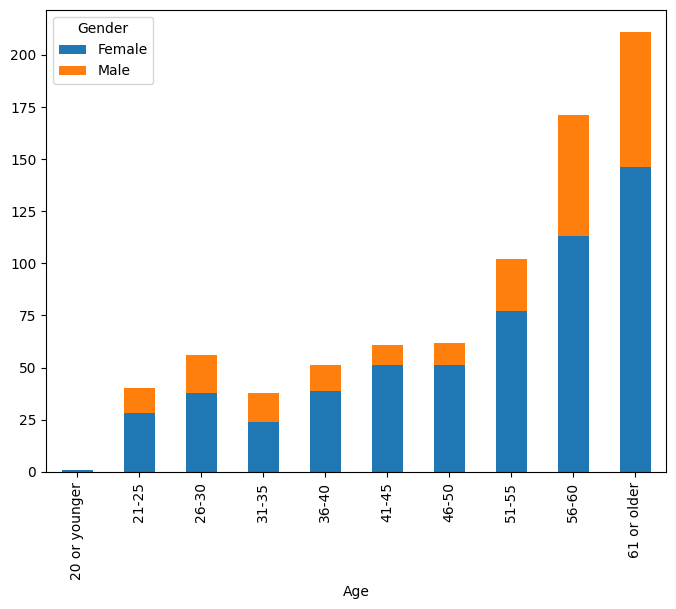

In [19]:
data.groupby(['Age', 'Gender']).size().unstack().plot(kind='bar', stacked=True, figsize=(8, 6));

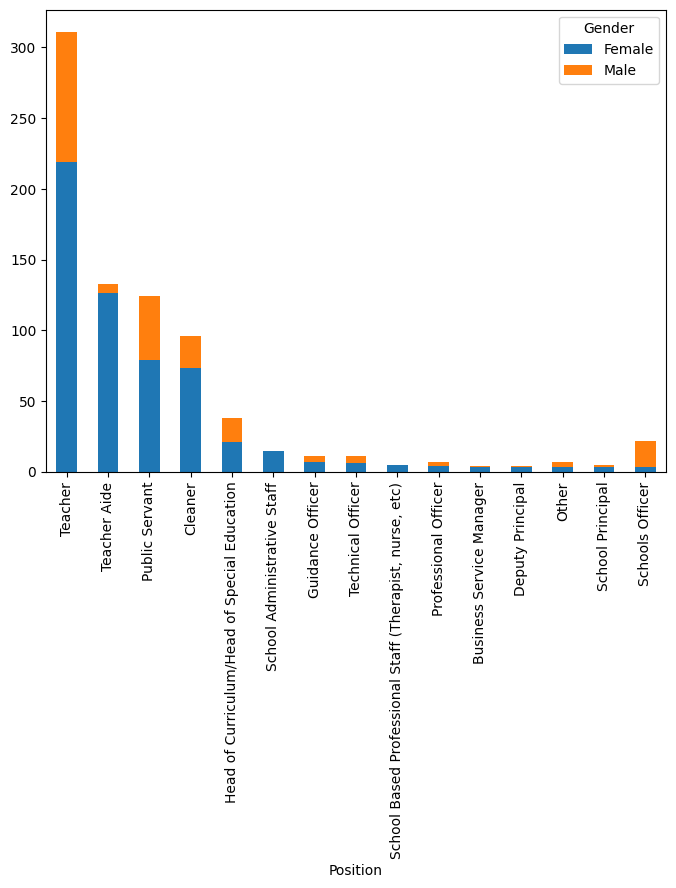

In [20]:
data.groupby(['Position', 'Gender']).size().unstack().fillna(0).sort_values(by='Female', ascending=False).plot(kind='bar', stacked=True, figsize=(8, 6));

Only one position has a majority of males leaving: Schools Officers.

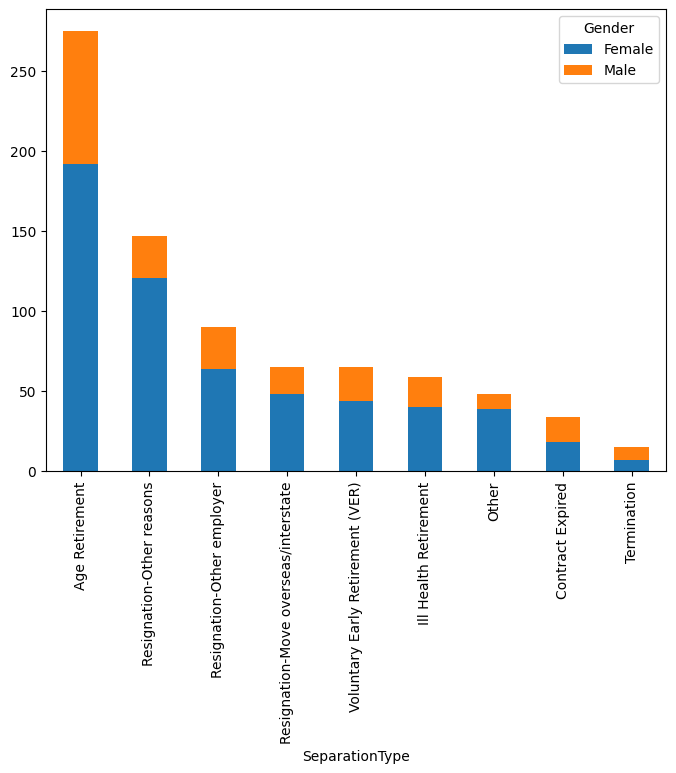

In [21]:
data.groupby(['SeparationType', 'Gender']).size().unstack().sort_values(by='Female', ascending=False).plot(kind='bar', stacked=True, figsize=(8, 6));

## TAFE Exit Survey Data

In [22]:
path = "data/tafe_survey.csv"
data = pd.read_csv(path)

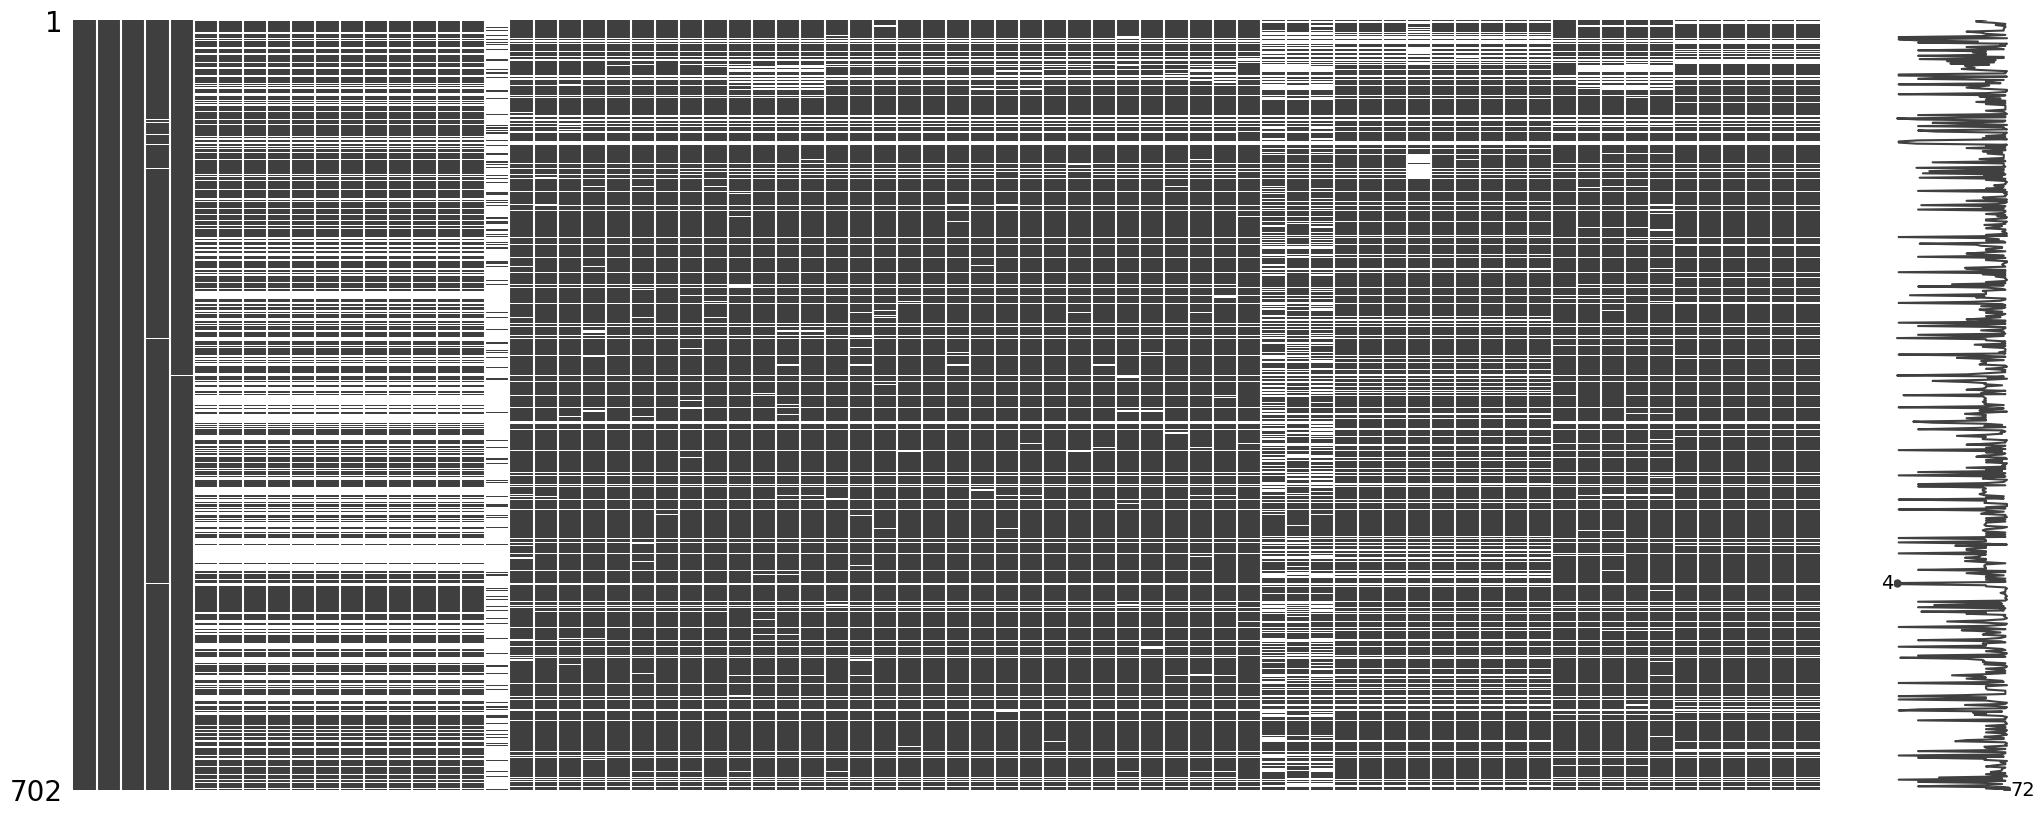

In [23]:
msno.matrix(data);

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [25]:
data.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

### Exit Survey

The Work Unit and Institute views are translated into numeric values: a neutral opinion is 0; above is a increasingly positive, below increasingly negative. Missing values are skipped. The table below shows the average figures for those who expressed an opinion.

In [26]:
opinion_translation = {'Strongly Agree': 2, 'Agree': 1, 'Neutral': 0, 'Disagree': -1, 'Strongly Disagree': -2, 'Not Applicable': None}

views = data.columns[18:48]
opinions = data[views].apply(lambda x: x.map(opinion_translation)).mean().sort_values(ascending=False)
opinions.rename(lambda x: " ".join(x.split(" ")[2:]), axis="index")

I worked well with my colleagues                                                                                                        1.336667
I had sufficient contact with other people in my job                                                                                    1.093904
My job was challenging and interesting                                                                                                  0.960067
I was given adequate support and co-operation by my peers to enable me to do my job                                                     0.948590
I was encouraged to use my initiative in the course of my work                                                                          0.918874
There was adequate communication between staff in my unit                                                                               0.842282
I was able to cope with the level of stress and pressure in my job                                                                

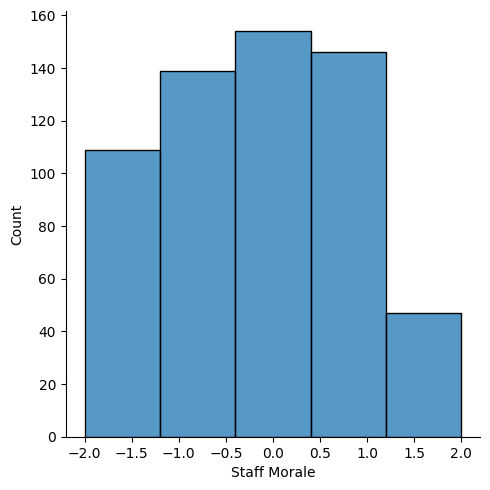

In [27]:
staff_morale = data['InstituteViews. Topic:10. Staff morale was positive within the Institute'].map(opinion_translation)
staff_morale.rename('Staff Morale', inplace=True)
sb.displot(staff_morale, kde=False, bins=5);

Staff morale skews negative because the number of people who 'Strong Disagree' is more than double the number who 'Strongly Agree'.

### Induction Survey

In [28]:
induction_translation = {'Yes': 1, 'No': 0, 'Face to Face': 1, "-": 0, 'On-line': 1, 'Induction Manual': 1}

inductionInfo = data.columns[49:61]
opinions = (data[inductionInfo].apply(lambda x: x.map(induction_translation)).mean().sort_values(ascending=False) * 100).astype(float).round(1)
opinions.rename(lambda x:  (" ".join(x.split(" ")[1:]).replace(":D", ": D")), axis="index")

Topic: Did you undertake a Institute Induction?                                                     91.3
Topic: Did you undertake Team Induction?                                                            64.8
Topic: Did you undertake a Corporate Induction?                                                     53.7
Face to Face Topic: Did you undertake a Institute Induction?                                        49.1
Face to Face Topic: Did you undertake Team Induction; Category?                                     34.1
Face to Face Topic: Did you undertake a Corporate Induction; Category:How it was conducted?         25.8
On-line Topic: Did you undertake a Institute Induction?                                             14.8
On-line Topic: Did you undertake a Corporate Induction; Category:How it was conducted?               9.5
Induction Manual Topic: Did you undertake a Institute Induction?                                     6.3
Induction Manual Topic: Did you undertake a Corporate I

### Workplace Survey

In [29]:
workplaceTopic = data.columns[61:66]
opinions = (data[workplaceTopic].apply(lambda x: x.map(induction_translation)).mean().sort_values(ascending=False) * 100).astype(float).round(1)
opinions.rename(lambda x:  (" ".join(x.split(":")[1:]).lstrip()), axis="index")

Does your workplace promote a work culture free from all forms of unlawful discrimination?    90.2
Does your workplace promote and practice the principles of employment equity?                 87.2
Does your workplace value the diversity of its employees?                                     83.3
Would you recommend the Institute as an employer to others?                                   71.6
Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?      62.8
dtype: float64

### Employment Duration

In [30]:
employment_duration = data['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(dropna=False)
employment_duration

LengthofServiceOverall. Overall Length of Service at Institute (in years)
Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: count, dtype: int64

In [31]:
print(f'{round(employment_duration['Less than 1 year'] / employment_duration.sum() * 100, 1)}% of staff are leaving within the first year of service.')

20.9% of staff are leaving within the first year of service.


### Roles

In [32]:
data['Classification. Classification'].value_counts(dropna=False)

Classification. Classification
Administration (AO)           293
Teacher (including LVT)       201
NaN                           106
Professional Officer (PO)      33
Operational (OO)               24
Tutor                          16
Workplace Training Officer     11
Technical Officer (TO)         10
Executive (SES/SO)              6
Apprentice                      2
Name: count, dtype: int64

TAFE is staffed by a lot of administration posts.

### Employment Status

In [33]:
data['Employment Type. Employment Type'].value_counts(dropna=False)

Employment Type. Employment Type
Permanent Full-time    237
Temporary Full-time    177
NaN                    106
Contract/casual         71
Permanent Part-time     59
Temporary Part-time     52
Name: count, dtype: int64

### Gender

In [34]:
data['Gender. What is your Gender?'].value_counts(dropna=False)

Gender. What is your Gender?
Female    389
Male      207
NaN       106
Name: count, dtype: int64

### Age

In [35]:
data['CurrentAge. Current Age'].value_counts(dropna=False)

CurrentAge. Current Age
56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: count, dtype: int64

### Reasons for Leaving

In [36]:
SeparationTypes = data['Reason for ceasing employment'].value_counts(dropna=False)
SeparationTypes

Reason for ceasing employment
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: count, dtype: int64

In [37]:
retiring = round(SeparationTypes['Retirement'] / SeparationTypes.sum() * 100)
print(f"{retiring}% of those leaving are retiring")

12% of those leaving are retiring


The top reason given for leaving in DETE was Retirement at 35%, for TAFE the corresponding figure is 12%